In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [3]:
# Define Create_Data_point function
def cdp(centeroids, num, clusterdeviation):
    X, y = make_blobs(n_samples=num, centers=centeroids, cluster_std=clusterdeviation)
    X = StandardScaler().fit_transform(X)
    return X, y

In [4]:
# Create Data
X, y = cdp([[4, 3], [2, -1], [-1, 4]], 1500, 0.5)

In [5]:
# DBSCAN
r = 0.3
m = 7
db = DBSCAN(eps=r, min_samples=m).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 2, 1, 1], dtype=int64)

In [6]:
# Find core samples
core_sample_mask = np.zeros_like(db.labels_, dtype = bool)
core_sample_mask[db.core_sample_indices_] = True
core_sample_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
# Number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [8]:
# Unique labels
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

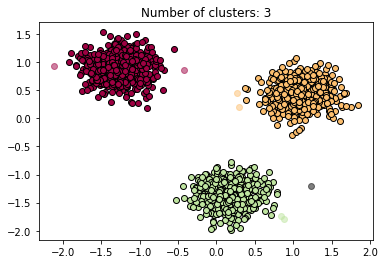

In [25]:
# colors
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    markersize = 6
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_sample_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker = u'o', c = col, alpha = 1, edgecolors='k')
    xy = X[class_member_mask & ~core_sample_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker = u'o', c = col, alpha = 0.5)
plt.title('Number of clusters: %d' % n_clusters_)
plt.show()